<img src="https://www.rephil.eu/images/emp-in.jpg" width="180" align="left">
<div align="center">
<i><br>
<font size="5"><b>Εθνικό Μετσόβιο Πολυτεχνείο</b></font><br>
<font size="4">Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών </font><br>

<font size="3"> Αχλάτης Στέφανος-Σταμάτης (ΑΜ: 03116149)
</font>
</i><br><br>

<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση.</p>

In [ ]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy.integrate import odeint
import random


#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Insert Data

In [ ]:
!cp "/content/drive/My Drive/sna/lab2/data/football/football.gml" .

In [ ]:
!cp "/content/drive/My Drive/sna/lab2/data/lesmis/lesmis.gml" .

In [ ]:
!cp "/content/drive/My Drive/sna/lab2/data/dolphins/dolphins.gml" .

#Introduction

##General

A genetic algorithm is a search heuristic that is inspired by Charles Darwin’s theory of natural evolution. This algorithm reflects the process of natural selection where the fittest individuals are selected for reproduction in order to produce offspring of the next generation.

The process of natural selection starts with the selection of fittest individuals from a population. They produce offspring which inherit the characteristics of the parents and will be added to the next generation. If parents have better fitness, their offspring will be better than parents and have a better chance at surviving. This process keeps on iterating and at the end, a generation with the fittest individuals will be found.

This notion can be applied for a search problem. We consider a set of solutions for a problem and select the set of best ones out of them.

Five phases are considered in a genetic algorithm.
1. Initial population
2. Fitness function
3. Selection
4. Crossover
5. Mutation





## Initial Population

The process begins with a set of individuals which is called a Population. Each individual is a solution to the problem you want to solve.

An individual is characterized by a set of parameters (variables) known as Genes. Genes are joined into a string to form a Chromosome (solution).

In a genetic algorithm, the set of genes of an individual is represented using a string, in terms of an alphabet. Usually, binary values are used (string of 1s and 0s). We say that we encode the genes in a chromosome.

##Fitness Function


The fitness function determines how fit an individual is (the ability of an individual to compete with other individuals). It gives a fitness score to each individual. The probability that an individual will be selected for reproduction is based on its fitness score.

## Selection

The idea of selection phase is to select the fittest individuals and let them pass their genes to the next generation.

Two pairs of individuals (parents) are selected based on their fitness scores. Individuals with high fitness have more chance to be selected for reproduction.

## Crossover

Crossover is the most significant phase in a genetic algorithm. For each pair of parents to be mated, a crossover point is chosen at random from within the genes.

Offspring are created by exchanging the genes of parents among themselves until the crossover point is reached.

The new offspring are added to the population.


##Mutation


In certain new offspring formed, some of their genes can be subjected to a mutation with a low random probability. This implies that some of the bits in the bit string can be flipped.

**Mutation occurs to maintain diversity within the population and prevent premature convergence.**

## Termination

The algorithm terminates if the population has converged (does not produce offspring which are significantly different from the previous generation). Then it is said that the genetic algorithm has provided a set of solutions to our problem.

## Final Thoughts

The population has a fixed size. As new generations are formed, individuals with least fitness die, providing space for new offspring.

The sequence of phases is repeated to produce individuals in each new generation which are better than the previous generation.

# Code Patern


```
START
Generate the initial population
Compute fitness
REPEAT
    Selection
    Crossover
    Mutation
    Compute fitness
UNTIL population has converged
STOP
```

#ΜΕΡΟΣ Α


### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

<p style=text-align:justify>Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. 

Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. 


Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.</p>

In [ ]:
def create_population(population_size):
    # Create the initial population
    # population of binary sequences
    # each sequence has size of 20 
    populations = np.random.randint(2, size=(population_size,20))
    return populations

def find_fitness(sequence):
    # Calculate fitness of chromosomes
    sum = 0
    for i,val in enumerate(sequence):
      sum+=val
    return sum

def proportional_selection(list_of_sequences,elitism):
    # Select chromosomes to pass to next population proportionally to their fitness

    # calculates the fitness for each sequence in list_of_sequences:
    fitness_eval = [] 
    for i,val in enumerate(list_of_sequences):
      fitness_eval.append(find_fitness(val))

    # calculates the sum of all the fitness
    sum_of_fitness=0 
    for i,val in enumerate(fitness_eval):
      sum_of_fitness += val

    ## Now calculate the Generalized roulette game
    ## base on the pseudocode from the slides
    ## for each sequence

    returned_sequence = np.zeros((list_of_sequences.shape[0],20))
    ## without elitism
    if (elitism==0):
      for num_of_sequence,sequence in enumerate(list_of_sequences):
        rand_number = random.uniform(0,1)
        i=0
        sum_to_check = fitness_eval[i]/sum_of_fitness
        while (i<seq.shape[0]-1 and rand_number > sum_to_check): 
          i+=1
          sum_to_check += fitness_eval[i]/sum_of_fitness

        returned_sequence[num_of_sequence] = list_of_sequences[i]
    else:
      # find and replace the elitism best values
      returned_sequence[0:elitism] = list_of_sequences[np.argsort(fitness_eval)[::-1][0:elitism]]
      # 8esh twn elitism se pli8ow megaliterwn ari8mwn
      for num_of_sequence in range(elitism, list_of_sequences.shape[0]):
          rand_number = random.uniform(0,1)
          i=0
          sum_to_check = fitness_eval[i]/sum_of_fitness
          while (i<seq.shape[0]-1 and rand_number > sum_to_check): 
            i+=1
            sum_to_check += fitness_eval[i]/sum_of_fitness

          # put all the others with high propbaility
          returned_sequence[num_of_sequence,:] = np.reshape(list_of_sequences[i,:], (1,20))

    return returned_sequence

def crossover(p_crossover, returned_sequence):
    # Apply crossover to population
    i = 0
    while (i < returned_sequence.shape[0] - 1):
        if (random.uniform(0, 1)) <= p_crossover:
            pos = np.random.randint(19)     
            k = pos + 1
            while (k < 20):
                aux = returned_sequence[i][k]
                returned_sequence[i][k] = returned_sequence[i+1][k]
                returned_sequence[i+1][k] = aux
                k += 1
        i += 2
    return returned_sequence


def mutation(p_mutation, returned_sequence):
    # Apply mutation to population
    for i in range(returned_sequence.shape[0]):
        for k in range(20):
            if (random.uniform(0, 1)) < p_mutation:
                if (returned_sequence[i][j] == 1):
                    returned_sequence[i][j] = 0
                else:
                    returned_sequence[i][j] = 1    
    return returned_sequence

def genetic_algorithm(p_mutation, p_crossover, m, elitism,T):
    # Genetic algorithm
    list_of_sequences = create_population(m)
    for t in range(T): 
        returned_sequence = proportional_selection(list_of_sequences, elitism)
        returned_sequence = crossover(p_crossover, returned_sequence)
        returned_sequence = mutation(p_mutation, returned_sequence)
    return returned_sequence

In [ ]:
best_fit = []
parametrs = []
# stable hyperparameters
T=10
# trainable hyperparameters
ms = [10,20,30,40,50,60,70,80,90,100]
p_crossovers = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
p_mutations = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
elitisms =[0,1,2,3,4]

#training
cnt = 0
for m in ms:
    for p_crossover in p_crossovers:
        for p_mutation in p_mutations:
            for elitism in elitisms:
                returned_sequence = genetic_algorithm(p_mutation, p_crossover, m, elitism, T)
                fitness = [find_fitness(returned_sequence[i]) for i in range(m)]
                best_fit.append(max(fitness))
                print("Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = {}".format((T, m, p_crossover, p_mutation, elitism)))
                print("Achiving score: {}".format(max(fitness)))
                print("-----")
                parametrs.append((T, m, p_crossover, p_mutation, elitism))
                cnt+=1

print() 
print("Results:")
print("Done {} fittings!".format(cnt))          
print("Max fitness score is: {}".format(max(best_fit)))
print("The model(s) with the best score had the following parametrs: (T, m, p_crossover,p_mutation,elitism) = ")
for i,score in enumerate(best_fit):
  if (score == max(best_fit)):
    print(str(parametrs[i]))

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Achiving score: 14.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.08, 1)
Achiving score: 16.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.08, 2)
Achiving score: 18.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.08, 3)
Achiving score: 17.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.08, 4)
Achiving score: 15.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.09, 0)
Achiving score: 14.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.09, 1)
Achiving score: 15.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.09, 2)
Achiving score: 15.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (10, 80, 0.7, 0.09, 3)
Achiving score: 16.0
-----
Fitting parametrs: (T,m, p_crossover,p_mutatio

Προφανώς το βέλτιστο score είναι 20, να είναι όλοι ασσοι. Βλέπουμε ότι ο γενετικός αλγόριθμος επιτυγχάνει αυτό το αποτέλεσμα. Ωστόσο οι εποχές που δώσαμε, Τ=10, ήταν οριακές στο να βγάλει το επιθυμητό αποτέλεσμα. Η βέλτιστη λύση πετυχαίνεται για ένα μεγάλο p_crossover και ένα μέσο p_mutation καθώς και με ελιτισμό=1 δηλαδή θέλει να έχει ελιτισμό το μοντέλο μας αλλά όχι πολύ έντονο. Το Τ ειναι μια υπερ παράμετρος που θα μπορούσε να μελετηθεί και να βελτιστοποιηθεί.
Αυτό είναι ένα καλό baseline που θα χρησιμοποιήσουμε ως template για το επόμενο ερώτημα.


### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

<p style=text-align:justify>Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.</p>

##### **Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)**
<p style=text-align:justify>Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.</p>

##### **Αρχικοποίηση**
<p style=text-align:justify>Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.</p>

##### **Συνάρτηση Fitness**
<p style=text-align:justify>Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.</p>

##### **Επιλογή (Selection)**
<p style=text-align:justify>Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό, δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.</p>

##### **Διασταύρωση (Crossover)**
<p style=text-align:justify>Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.</p>

##### **Μετάλλαξη (Mutation)**
<p style=text-align:justify>Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.</p>

##### Κριτήριο Τερματισμού (Stopping Criterion)
<p style=text-align:justify>Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.</p>

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

<p style=text-align:justify>Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.</p>


In [ ]:
### ATTENTION: don't change because the variables are used in the given code
### the use of the converted graph is optional

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [ ]:
def create_population(G):
    # Create the initial population
    # we want 300 for each phase and the N of the G
    populations = np.zeros((300,len(list(G.nodes()))))
    for i in range(300):
        for j,val in enumerate(G.nodes()):
            populations[i][j] = np.random.choice(list(G.neighbors(j)), 1)[0]
            # match with neigboor
            # anagnwristiko kombou
    return populations

def find_fitness(chrom, idx, graph):
    # Calculate fitness of chromosomes

    # init
    G = nx.Graph()
    for j in range(chrom.shape[1]):
        G.add_node(j)
    for v,u in enumerate(chrom[idx,:]):
        if G.has_edge(v,u):
            continue
        G.add_edge(v,u)
    
    # adj of intir  
    A = nx.to_numpy_matrix(graph)
    A = np.squeeze(np.asarray(A))
            
    comps = list(nx.connected_components(G))
    num_comps = len(comps)
    
    fitness = 0
    for comp in comps:
        comp = list(comp)
        comp = [ int(x) for x in comp ]
        # Adjacency matrix of subgraph
        A_Sub = A[comp][:,comp]
        # rows mean values of subgraph
        mvalues = np.mean(A_Sub, axis=1)
        # M(S)
        # r=2
        Ms = sum(np.power(mvalues, 2))/A_Sub.shape[0]
        # us 
        u_s = sum(sum(A_Sub))
        # Qs
        Qs = Ms * u_s
        fitness += Qs      
    return fitness

def proportional_selection(list_of_sequences,elitism, G):
    # Select chromosomes to pass to next population proportionally to their fitness

    # calculates the fitness for each sequence in list_of_sequences:
    fitness_eval = [] 
    for i in range(list_of_sequences.shape[0]):
        fitness_eval.append(find_fitness(list_of_sequences, i, G))

    # calculates the sum of all the fitness
    sum_of_fitness=0 
    for i,val in enumerate(fitness_eval):
      sum_of_fitness += val

    ## Now calculate the Generalized roulette game
    ## base on the pseudocode from the slides
    ## for each sequence

    returned_sequence = np.zeros((list_of_sequences.shape[0],list_of_sequences.shape[1]))
    ## without elitism just for testing perpuses
    if (elitism==0):
      for num_of_sequence,sequence in enumerate(list_of_sequences):
        rand_number = random.uniform(0,1)
        i=0
        sum_to_check = fitness_eval[i]/sum_of_fitness
        while (i<list_of_sequences.shape[0]-1 and rand_number > sum_to_check): 
          i+=1
          sum_to_check += fitness_eval[i]/sum_of_fitness

        returned_sequence[num_of_sequence] = list_of_sequences[i]
    else:
      # find and replace the elitism best values
      returned_sequence[0:elitism] = list_of_sequences[np.argsort(fitness_eval)[::-1][0:elitism]]
      # 8esh twn elitism se pli8ow megaliterwn ari8mwn
      for num_of_sequence in range(elitism, list_of_sequences.shape[0]):
          rand_number = random.uniform(0,1)
          i=0
          sum_to_check = fitness_eval[i]/sum_of_fitness
          while (i<list_of_sequences.shape[0]-1 and rand_number > sum_to_check): 
            i+=1
            sum_to_check += fitness_eval[i]/sum_of_fitness

          # put all the others with high propbaility
          returned_sequence[num_of_sequence,:] = np.reshape(list_of_sequences[i,:], (1,list_of_sequences.shape[1]))

    return returned_sequence

def crossover(p_crossover, returned_sequence):
    count = 0
    returned_sequence2 = np.zeros((returned_sequence.shape[0],returned_sequence.shape[1]))  # child
    while (count < returned_sequence.shape[0]):
        i = 0
        while (i < returned_sequence.shape[0] - 1):
            x = random.uniform(0, 1)
            if x <= p_crossover:            
                # Mask
                mask = np.random.randint(2, size=returned_sequence.shape[1])
                # Child
                for j in range(returned_sequence.shape[1]):
                    if mask[j] == 0:
                        returned_sequence2[count][j] = returned_sequence[i][j]

                    elif mask[j] == 1:
                        returned_sequence2[count][j] = returned_sequence[i+1][j]       
                # Child Next
                count += 1
                if count == returned_sequence.shape[0]:
                    return returned_sequence2      
            i += 1 
    return returned_sequence2


def mutation(p_mutation,returned_sequence,G):
    # Apply mutation to population
    for i in range(returned_sequence.shape[0]):
        for j in range(returned_sequence.shape[1]):
            if (random.uniform(0, 1)) < p_mutation:
                returned_sequence[i][j] = np.random.choice(list(G.neighbors(j)), 1)[0]
    return returned_sequence

def genetic_algorithm(G, p_mutation, p_crossover, elitism, T=30):    # Genetic algorithm
    list_of_sequences = create_population(G)
    best_fit = 0
    count_fit = 0    
    for t in range(T):
        list_of_sequences = proportional_selection(list_of_sequences, elitism, G)
        list_of_sequences = crossover(p_crossover, list_of_sequences)
        list_of_sequences = mutation(p_mutation, list_of_sequences,G)
    
        # 2nd rule of Termination
        fitness = [] 
        for i in range(len(list_of_sequences)):
             fitness.append(find_fitness(list_of_sequences, i, G))                
        cur_fit = max(fitness)
        if cur_fit == best_fit:
            count_fit += 1   
        if count_fit == 5:
            return list_of_sequences
    
    return list_of_sequences


In [ ]:
def myMain(G):
  best_fit = []
  best_arg = []
  parametrs = []
  # stable hyperparameters
  T=30
  m=300
  p_crossovers = [0.7, 0.8, 0.9]
  p_mutations = [0.1, 0.2]
  elitisms =[1,2,3,4]
  cnt=0
  for p_crossover in p_crossovers:
    for p_mutation in p_mutations:
      for elitism in elitisms:
        returned_sequence = genetic_algorithm(G,p_mutation, p_crossover,elitism, T)
        fitness = [find_fitness(returned_sequence,i,G) for i in range(m)]
        best_fit.append(max(fitness))
        best_arg.append(returned_sequence[np.argmax(fitness)])
        print("Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = {}".format((T, m, p_crossover, p_mutation, elitism)))
        print("Achiving score: {}".format(max(fitness)))
        print("-----")
        parametrs.append((T, m, p_crossover, p_mutation, elitism))
        cnt+=1

  print() 
  print("Results:")
  print("Done {} fittings!".format(cnt))          
  print("Max fitness score is: {}".format(max(best_fit)))
  print("The model(s) with the best score had the following parametrs: (T, m, p_crossover,p_mutation,elitism) = ")
  for i,score in enumerate(best_fit):
    if (score == max(best_fit)):
      print(str(parametrs[i]))
  return best_arg, parametrs

In [ ]:
# perform this for the last c
def compute_modularity(G, G_best_arg, G_parameters):
    modularities = []
    number_communities = []
    for i,chrom in enumerate(G_best_arg):
        
        # initi
        GG = nx.Graph()
        for j in range(len(chrom)):
            GG.add_node(j)
        for v,u in enumerate(chrom):
            if GG.has_edge(u,v):
                continue
            GG.add_edge(v,u)

        # connect comp
        communities = [list(comp) for comp in list(nx.connected_components(GG))]

        # modularity 
        modularities.append(nx.algorithms.community.quality.modularity(G, communities))
        number_communities.append(len(communities))
        print("Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = {}".format(G_parameters[i]))
        print("Achiving modularity: {}".format(nx.algorithms.community.quality.performance(G, communities)))
        print("And found  {} communities".format(len(communities)))
        print("-----")
        #print(nx.algorithms.community.quality.performance(G, communities))
   
    best_modularity_i = np.argmax(modularities)
    best_modularity = modularities[best_modularity_i]
    best_parameters = G_parameters[best_modularity_i]  
    best_number_communities = number_communities[best_modularity_i]  
    print() 
    print("Results:")        
    print("Max modularity is: {}".format(best_modularity))
    print("And found  {} communities".format(best_number_communities))
    print("The model(s) with the best modularity had the following parametrs: (T, m, p_crossover,p_mutation,elitism) = ")
    print(best_parameters)
    return best_modularity, best_number_communities

###Footbal

In [ ]:
football_best_arg, football_parameters = myMain(football)

Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 1)
Achiving score: 168.38017650750788
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 2)
Achiving score: 252.49315509748078
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 3)
Achiving score: 236.1683297310477
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 4)
Achiving score: 204.54221539614466
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 1)
Achiving score: 185.67969065081496
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 2)
Achiving score: 193.4415170735336
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 3)
Achiving score: 157.18257219615808
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 4)
Achiving score: 182.9186244392288
-----
Fitting parametrs: 

In [ ]:
football_best_modularity, football_best_number_communities = compute_modularity(football,football_best_arg,football_parameters)

Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 1)
Achiving modularity: 0.8732265446224257
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 2)
Achiving modularity: 0.8826849733028223
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 3)
Achiving modularity: 0.8901601830663616
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 4)
Achiving modularity: 0.9020594965675057
And found  13 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 1)
Achiving modularity: 0.8587337909992372
And found  9 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 2)
Achiving modularity: 0.9048054919908467
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2

###Lesmis

In [ ]:
lesmis_best_arg, lesmis_parameters = myMain(lesmis)

Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 1)
Achiving score: 155.0451041936616
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 2)
Achiving score: 151.47750659201915
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 3)
Achiving score: 148.48423543585915
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 4)
Achiving score: 153.47626539936834
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 1)
Achiving score: 142.32050603114445
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 2)
Achiving score: 129.09459489043235
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 3)
Achiving score: 154.04281815326112
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 4)
Achiving score: 120.62257897767074
-----
Fitting parametrs

In [ ]:
lesmis_best_modularity, lesmis_best_number_communities = compute_modularity(lesmis,lesmis_best_arg,lesmis_parameters)

Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 1)
Achiving modularity: 0.8393711551606289
And found  8 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 2)
Achiving modularity: 0.8868762816131237
And found  11 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 3)
Achiving modularity: 0.9172932330827067
And found  12 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 4)
Achiving modularity: 0.84107997265892
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 1)
Achiving modularity: 0.7481203007518797
And found  7 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 2)
Achiving modularity: 0.784688995215311
And found  9 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 3)


###Dolphins

In [ ]:
dolphins_best_arg, dolphins_parameters = myMain(dolphins)

Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 1)
Achiving score: 28.991364517156722
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 2)
Achiving score: 34.69746510880954
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 3)
Achiving score: 33.367177622184784
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 4)
Achiving score: 37.617901738473165
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 1)
Achiving score: 28.682585188390835
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 2)
Achiving score: 29.050995900520704
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 3)
Achiving score: 34.4822915451895
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 4)
Achiving score: 28.40652777777778
-----
Fitting parametrs: (

In [ ]:
dolphins_best_modularity, dolphins_best_number_communities = compute_modularity(dolphins,dolphins_best_arg,dolphins_parameters)

Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 1)
Achiving modularity: 0.8952934955050238
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 2)
Achiving modularity: 0.896351136964569
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 3)
Achiving modularity: 0.9011105235325225
And found  11 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.1, 4)
Achiving modularity: 0.8831306187202538
And found  11 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 1)
Achiving modularity: 0.8820729772607087
And found  11 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2, 2)
Achiving modularity: 0.8852459016393442
And found  10 communities
-----
Fitting parametrs: (T,m, p_crossover,p_mutation,elitism) = (30, 300, 0.7, 0.2

#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου ανάλογα με τις τιμές των παραμέτρων

### Find the best partition with Girvan-Newman, Spectral Clustering and Modularity Maximization
<p style=text-align:justify>Aποτέλεσματα των αλγορίθμων της δεύτερης εργαστηριακής άσκησης (με προτεινόμενη υλοποίηση).</p>

In [ ]:
import itertools

# Girvan_newman:partitions of at most k communities, select the one with the highest value of modularity.
def comd_GN(G,k):
    gn_G = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, gn_G)
    per_G = []
    com_G = []
    for communities in limited:
        per = nx.algorithms.community.quality.modularity(G,communities)
        per_G.append(per) #list of performance of each partition
        com_G.append(communities) # list of partitions
    max_mod_G = max(per_G) # maximum modularity value
    index_G = per_G.index(max(per_G)) # index of maximum modularity
    best_G = com_G[index_G] # the partition of maximum modularity  
    num_best_G = len(best_G)
    return best_G, max_mod_G, num_best_G

GN_best_football, GN_mod_football, GN_num_football = comd_GN(football,50)
GN_best_lesmis, GN_mod_lesmis, GN_num_lesmis = comd_GN(lesmis,50)
GN_best_dolphins, GN_mod_dolphins, GN_num_dolphins = comd_GN(dolphins,50)

In [ ]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
def comd_SP(G,k):
    mG = np.array(nx.to_numpy_matrix(G))
    clustering = SpectralClustering(n_clusters=k,random_state=0, affinity='precomputed').fit(mG)
    clabels = clustering.labels_
    numc = clustering.n_clusters
    b = dict(enumerate(clabels,0)) # create a mapping of nodes indices to the community it belongs
    d = [] # a list of all communities (each list is a community)
    for i in range(0,numc):
        d.append([k for k,v in b.items() if float(v) == i])
    per = nx.algorithms.community.quality.modularity(G,d)
    return d, per, numc

def find_best_SP_partition(G,k):
    com = []
    com_mod = []
    com_num = []
    for i in range(2,k):
        tcom,tcom_mod,tcom_num = comd_SP(G,i)
        com.append(tcom)
        com_mod.append(tcom_mod)
        com_num.append(tcom_num)
    index = com_mod.index(max(com_mod))
    G_SP = com[index]
    G_SP_mod = com_mod[index]
    G_SP_num = com_num[index]
    return G_SP, G_SP_mod, G_SP_num

football_SP, football_SP_mod, football_SP_num = find_best_SP_partition(football,50) 
lesmis_SP, lesmis_SP_mod, lesmis_SP_num = find_best_SP_partition(lesmis,50)  
dolphins_SP, dolphins_SP_mod, dolphins_SP_num = find_best_SP_partition(dolphins,50)

In [ ]:
# Modularity Maximization
def comd_MM(G):
    c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mm_G = []
    for i,j in enumerate(c):
        a = list(j)
        mm_G.append(a)
    per = nx.algorithms.community.quality.modularity(G,mm_G)
    num_G = len(mm_G)
    return mm_G, per,num_G

football_MM, football_MM_mod, football_MM_num = comd_MM(football)
lesmis_MM, lesmis_MM_mod, lesmis_MM_num = comd_MM(lesmis)  
dolphins_MM, dolphins_MM_mod, dolphins_MM_num = comd_MM(dolphins)

### Compare best modularity scores for all algorithms

In [ ]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_football, GN_mod_football))
print ("Spectral Clustering: %r communities with modularity score %r" %(football_SP_num, football_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM_num, football_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(football_best_number_communities,football_best_modularity))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_lesmis, GN_mod_lesmis))
print ("Spectral Clustering: %r communities with modularity score %r" %(lesmis_SP_num, lesmis_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM_num, lesmis_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r"%(lesmis_best_number_communities,lesmis_best_modularity))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_dolphins, GN_mod_dolphins))
print ("Spectral Clustering: %r communities with modularity score %r" %(dolphins_SP_num, dolphins_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM_num, dolphins_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(dolphins_best_number_communities,dolphins_best_modularity))

American College Football
Girvan-Newman: 10 communities with modularity score 0.5996290274077957
Spectral Clustering: 11 communities with modularity score 0.6022010863056824
Modularity Maximization: 6 communities with modularity score 0.5497406651426807
Genetic Algorithm: 11 communities with modularity score 0.46255678355585483

Les Miserables
Girvan-Newman: 11 communities with modularity score 0.5380680761361523
Spectral Clustering: 7 communities with modularity score 0.5382230764461529
Modularity Maximization: 5 communities with modularity score 0.5005967511935024
Genetic Algorithm: 8 communities with modularity score 0.5212970425940852

Dolphins
Girvan-Newman: 5 communities with modularity score 0.5193821446936434
Spectral Clustering: 6 communities with modularity score 0.49497646453858624
Modularity Maximization: 4 communities with modularity score 0.4954906847039278
Genetic Algorithm: 8 communities with modularity score 0.4582492781139987


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

Από το προηγούμενο ερώτημα είδαμε ότι το baseline σύστημα μας θέλει ελιτισμό, και γενικά υψηλό  p_crossover και ένα χαμηλό p_mutation. Έτσι στο “gridsearch” βάλαμε αντίστοιχες τιμές. 

Παρατηρούμε ότι το modularity και το πλήθος των community που πετυχαίνουμε με τους γενετικούς αλγορίθμους είναι κοντά στην απόδοση των κλασσικών αλγοριθμων εντοπισμό κοινοτήτων όσο και στον απληστο Modularity Maximization.
Γενικά στο πρόβλημα με το ποδόσφαιρο δίνει αρκετά χαμηλότερο αλλά αποδεκτό modularity, χαμηλότερο και απο τον άπληστο αλγόριθμο.Αυτό ίσως να οφείλεται και στην ιδιαίτερη δομή του γράφου football.

Στο πρόβλημα των Les Miserables δίνει καλύτερο modularity ακόμη και από τον άπληστο αλγόριθμο. Ενώ στο πρόβλημα τον δελφινιών δίνει χειρότερο και από τον άπληστο αλλά όχι τόσο μακρια από αυτον. 

Επομένως βλέπουμε ότι οι γενετικοί αλγόριθμοι μπορούν να χρησιμοποιηθούν για την εύρεση κοινοτήτων δίνοντας ικανοποιητικές επιδόσεις αλλά και γενικά οι γενετικοί αλγόριθμοι μπορούν να χρησιμοποιηθούν για ένα μεγάλο εύρος προβλημάτων, δείχνοντας ότι ο βιομιμητισμός αποδίδει σε πολλά τεχνητα συστήματα συμπέρασμα αρκετά εντυπωσιακό.

Ωστόσο οι κλασικοί αλγόριθμοι πετυχαν και στα 3 προβλήματα καλύτερο modularity, ενω greedy πετύχαινε συγκρίσιμα αποτελέσματα αν και έτρεχε πολύ πιο γρήγορα από τον γενετικό.

Φυσικά, θα μπορουσαμε να κάνετε πιο πληρες “grid search” για να έχουμε πιο ολοκληρωμένη εικόνα και να βλέπαμε πως δουλεύουν και σε άλλα δίκτυα.


# ΜΕΡΟΣ Β

Σε αυτό το μέρος θα επικεντρωθείτε στην αριθμητική επίλυση των βασικών επιδημιολογικών μοντέλων SIR και SIS: <a style="text-decoration:none" href=https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model>αριθμητική επίλυση συστημάτων διαφορικών εξισώσεων με scipy</a></p>


#### Θεωριτικό Υπόβαθρο 
Οι εξισώσεις Lotka–Volterra equations είναι η βασικές εξισώσεις που περιγράφουν μια επιδημία.
Κάποια βασικά στοιχεία
Κατασταση κόμβου: Κάθε ένας νόμιμος κόμβος(μέλος πληθυσμού που κοιτάμε πχ για SARS COV 2 ανθρωποι) μπορεί να πάρει μία από τις δυνατές καταστάσεις.
Υπάρχουν και οι κόμβοι που επιτύθονται.
 
Οι 4 πιο σημαντικές καταστάσεις είναι:
Susceptible S(t): πλήθος κόμβων που είναι υγιής αλλά εν δυνάμει μπορεί να δεχτεί μια μόλυνση
Infected I(t): σύνολο κόμβων που έχουν μολυνθεί
Removed R(t): σύνολο κόμβων που έχουν μολυνθεί αλλά έχουν απομακρυνθεί από την επιδημία, π.χ. επειδή έχουν αντισώματα
Dead D(t): Έχει πολλές ερμηνείες ανάλογα με την εφαρμογή. Μπορεί να δηλώνει το σύνολο κόμβων που έχουν πλήρης ανοσία και δεν γίνεται να μολυνθεί από την επιδημία, δηλαδή αυτοί οι κόμβοι για την επιδημια ειναι σαν να μην βρίσκομαι εκεί. Επίσης μπορεί να σημαίνει και μια τερματική κατάσταση (θανατος) 
Κάποιες ακόμη καταστάσεις:
Passive Immunity πχ αυτή που έχουν τα έμβρυα, ισχυρή ανοσία που χάνεται γρήγορα
Exposed όταν ένας κόμβος είναι εκτεθυμένος
 
Αφου ορισω καταστάσεις ορίζω το μοντέλο επιμόλυνσης
Που καθοριζει συγκεκριμενες καταστασεις που οι κομβοι μπορει να βρεθουν αναλογα με την διαδοση του ιου. Περιγραφουν με γενικευμενο τροπο τις μεταβάσεις του ιού που γίνονται απο κατασταση σε κατάσταση για κάθε χρήστη. Άρα γενικά περιγράφουν Καταστάσεις και διαδοχή Καταστάσεων
Διακρίνεται σε μικροσκοπικη και μακροσκοπικη.
Πχ αν εστιάσουμε μόνο για έναν ιό (πχ SARS COV2) τότε κάνουμε μικροσκοπική μελέτη, αν κοιτάμε και άλλους ιούς τότε κάνουμε μακροσκοπική θεώρηση. Πχ μια διαφορά είναι ότι αν κάποιος είναι Infected σε μια μακροσκοπική θεώρηση θα μπορούσε να έχει οποιοδήποτε ιο και όχι μόνο SARS COV 2 (για πχ)
πχ μοντέλο επιμόλυνσης
SI: Μετάβαση από το S στο Ι
SIS: Μετάβαση από το S στο I και πίσω στο S
SIR: Μετάβαση από το S στο I και μετά στο R
πχ το SI μικροσκοπικά για AIDS είναι κατάλληλο για περιγραφή του
Ενδιαφέρον το έχει το μοντέλο SIRD έχει και μπορεί να περιγραφεί μικροσκοπικά τον sars cov 2 όπου κάποιος από S πάει στο I και μετά είτε R είτε D αλλά μπορεί επίσης απο το S να πάει κατευθείαν στο R, μέσω εμβολίου που δίνει ανοσία για πάντα. 
 
Σχετικά με το SI (βαση μοντέλων μας):
Θέλει μια διαφορική εξίσωση για να περιγράψει το σύστημα το σύστημα αφου το S(t)+I(t)=N, όπου Ν είναι ο συνολικός πληθυσμός. Αρα θελω να δείξω την μεταβολή είτε στο S είτε στο I. 
Ορίζουμε ως β τον ρυθμό που μπορεί να μολυνθούν δύο κόμβοι σε μια επαφή (point to point), έχουμε 
Ορίζουμε ως β τον ρυθμό που έρχονται σε επαφή οι κόμβοι του συστήματος. Βλέπουμε ότι όταν έρχονται δύο κόμβοι σε επαφή μπορεί να μολύνει ο ένας τον άλλον με μια πιθανότητα και έτσι το β παράγει τον ρυθμο μόλυνσης.
Ο ρυθμός μεταβολης Ι είναι θετικός αρα αυξάνεται, όσο μεγαλύτερο β τόσο μεγαλύτερο και είναι αναλογα του I και S. Αν έχω πολλούς I και S τότε ο ρυθμός νέων μολύνσεων είναι μεγάλος. Όταν έχω πολλούς S αλλά λίγους Ι τότε ο ρυθμός νέος μολύνσεων είναι μικρός.
Η εξίσωση αυτή είναι μη γραμμική. Μπορεί να λυθεί αναλυτικά.
Μπορούμε να ορίσουμε και την ανηγμένη μορφή της εξίσωσης για να βλέπουμε τα ποσοστα των μολυσμένων.
Η λύση της εξίσωσης επιβεβαιώνει την εμπειρία μας και την γνωστη “εκθετική καμπύλη” του ιού. Στην αρχή δεν έχουμε πολλούς μολυσμένους και αυξάνει πολύ απότομα το πλήθος των Ι, και σε κάποια στιγμή θα έχουμε πολλούς Ι και λίγους S και άρα το σύστημα θα ηρεμήσει.
 
Προφανώς, ο ρυθμός του μείωσης του S σχετίζεται με τον προηγούμενο ρυθμό αφού S(t)+I(t)=N
 
SIR: Καταλληλο μοντελο για γρίπη που την μελετάμε ανα έτος
Ονομάζεται και Kermack-McKendrick απο τους επιστήμονες που τον πρότειναν.
Θα χρειαστούμε την προηγούμενη εξίσωση και χρησιμοποιούμε την κανονικοποιημένη μορφή της. 
Αλλά θέλουμε και μια ακόμη εξίσωση. Όμως τώρα S(t)+I(t)+R(t)=N.
Ο πληθυσμός του I(t) δεν μεταβάλλεται μόνο από αυτό που έρχεται από το S(t), όταν γίνονται μόλυνσης, αλλά μεταβάλλεται  και απο αυτους που ειναι μολυσμενη και περνάνε στην κατάσταση r, αρα για να περιγραψω το di/dt πρέπει να βάλω έναν ακόμη μειων όρο που θα δείχνει αυτούς που φεύγουν από το I(t) και πηγαινουν στο R. Όμως ο τρόπος που πηγαίνω απο το i στο R εξαρτάται μόνο από το I και όχι από το R, και σε εναν ιο δηλώνει ότι πρέπει να περάσει ο ίδιος ο άνθρωπος τον ιο. Έστω ότι από το I πάω στο R με ρυθμό γ, που είναι ο μέσος ρυθμός ιασης.
Άρα έχουμε το di/dt =  βS(t)I(t) -γI(t). 
Άρα τώρα έχουμε δυο διαφορικές συζευγμένο μη γραμμικό σύστημα και δεν έχουν γενικά λύση και το αντιμετωπίζω με αριθμητικές μεθόδους.
Κάποια χαρακτηριστικά του SIR:
Ορίζουμε το Ro = b/γ , που ονομάζεται ως basic reproduction number, ρυθμος μολυνσεων προς ανακαλύψεων. Αν είναι πάνω από ένα έχω περισσότερες μολύνσεις από ότι ανακάμψεις. Αν είναι κάτω ένα μπορώ να έχω ασυμπτωτική αποφόρτιση των μολύνσεων. 
Μια άλλη σημαντική παράμετρος είναι είναι η Force of infection  F=βΙ, που είναι ο πραγματικός ρυθμός μετάβασης από τους υγιείς στου ασθενείς.
 
Μπορούμε να βάλουμε στο μοντέλο μας και θανάτους και γεννήσεις σε κάθε κατάσταση. Πχ έχουμε έναν ρυθμό μ θανάτων υγιών ανθρώπων και ένα ρυθμό γεννήσεων Λ. Γενικά στη βιβλιογραφία το Λ είναι ανηγμένο ως προς τον πληθυσμο.
 
Γενικά στο μοντέλο γεννήσεων/θανάτων πρέπει S,I,R>=0 και να ορίσω και τις 3 αρχικές τιμές S(0),R(0),I(0). Στο απλό μοντέλο δεν χρειάζεται να ορίσω και τις τρείς τιμές αφού υπάρχει η σύνδεση της τρίτης με την σχέση:S(t)+I(t)+R(t)=N
 
SIS μοντέλο
Έχουμε μια παλινδρόμηση μεταξύ υγιούς και ασθενούς. Είναι καλό μοντέλο μακροσκοπικά για βιολογικούς ιούς και για κακοβουλο λογισμικό. 
 Το γI(t) που φεύγει από το I (με -) πάει στο S με +γI(t), αφού ισχύει η εξίσωση συνέχεια.
Αυτό το μοντέλο αναφέρεται στην βιβλιογραφία ως λογιστικη εξισωση.
Έχουμε εξαφάνιση όταν βΝ/γ<=1 (είναι το Ro ανηγμένο στο Ν) 
Αρχικά έχουμε ένα μεταβατικό μοντέλο και μετά έχουμε μια σταθερή ενδημική κατάσταση ή μια κατάσταση που έχουμε το αντίστροφο.
Στην εργασία βλέπουμε μια εποχικότητα, μια εποχικότητα με την χρήση διαμόρφωσης ενός ημιτόνου.


> Προσοχή το x δεν ορίζεται κάπου σαφώς αλλά είναι μια παραμετροποίηση. Θεωρώ ότι είανι το πιο μεταβλητό κομάτι του ΑΜ μου δηλαδή το τελευταίο ψηφίο. Άρα x=9

#### Άσκηση 1: SIR

Το SIR μοντέλο περιγράφεται από το σύνολο διαφορικών εξισώσεων

$\frac{dS}{dt} = -\frac{\beta S I}{N}$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Για τις παραμέτρους που φαίνονται στον ακόλουθο Πίνακα 3, να δείξετε σε κοινό διάγραμμα για κάθε συνδυασμό παραμέτρων, τα $S(t)$,$I(t)$,$R(t)$.Τι παρατηρείτε; Σχολιάστε τα αποτελέσματα σε σχέση με το βασικό ρυθμό αναπαραγωγής $R_0$.

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\beta$</td>
     <td style=text-align:center colspan='6'>$10^{-3}$</td>
</tr>
<tr>
    <td style=text-align:center>$\gamma$</td>
    <td style=text-align:center>$10^{-6}$</td>
    <td style=text-align:center>$10^{-5}$</td>
    <td style=text-align:center>$10^{-4}$</td>
    <td style=text-align:center>$10^{-3}$</td>
    <td style=text-align:center>$10^{-2}$</td>
    <td style=text-align:center>$10^{-1}$</td>
</tr>
<tr>
    <td style=text-align:center>$S(0)$</td>
    <td style=text-align:center colspan='6'>$590$</td>
</tr>
<tr>
    <td style=text-align:center>$I(0)$</td>
    <td style=text-align:center colspan='6'>$19$</td>
</tr>
    <tr>
    <td style=text-align:center>$R(0)$</td>
    <td style=text-align:center colspan='6'>$0$</td>
</tr>
</table>

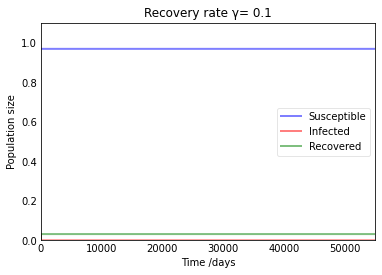

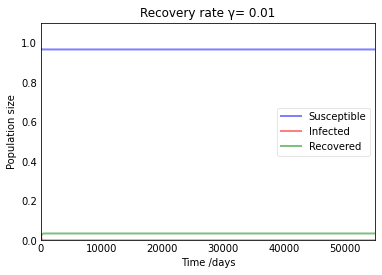

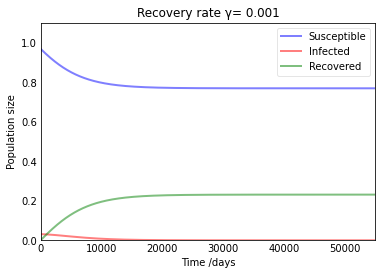

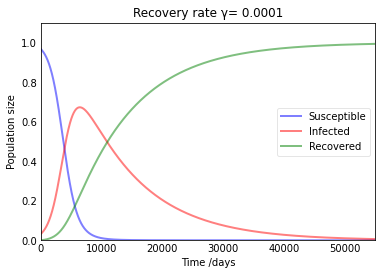

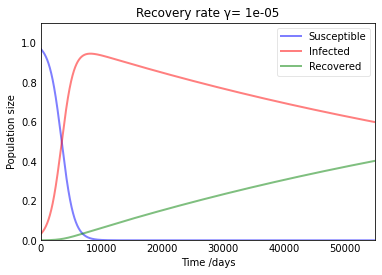

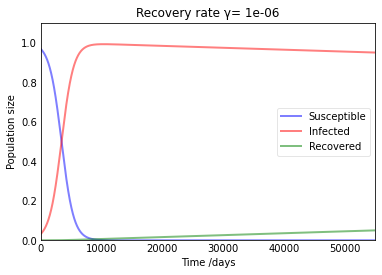

In [ ]:
def solve_SIR(g):
    I0 = 19
    R0 = 0
    S0 = 590
    N = S0 + I0 + R0 #total population, N.
    beta = 10**(-3)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)

    t = np.linspace(0, 55000, 200000) # A grid of time points (in days)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    y0 = S0, I0, R0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #Integrate the SIR equations over the time grid, t.
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("Recovery rate γ= %r" %10**(-g))
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Population size')
    ax.set_ylim(0,1.1)
    ax.set_xlim(0,55000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()    
    
for i in np.linspace(1,6,num=6):
    solve_SIR(i)

#### Σχολιασμός SIR

Σε αυτή την Άσκηση μελετάμε πως επηρεάζει το γ, δηλαδή ο μέσος ρυθμός ιασης την πορεία της επιδημίας. Οι άλλοι παράμετροι είναι σταθερή και ορίζονται στον προηγούμενο πίνακα.

Τα μεγέθη είναι ανηγμένα ως προς το Ν, δηλαδή το συνολικό πληθυσμό του συστήματος.
Αξίζει να αναφέρουμε ότι το β=0.001 και σχετίζεται με τον ρυθμό μολύνσεων.

Ορίζουμε το Ro = b/γ , που ονομάζεται ως basic reproduction number, ρυθμος μολυνσεων προς ανακαλύψεων. Αν είναι πάνω από ένα έχω περισσότερες μολύνσεις από ότι ανακάμψεις. Αν είναι κάτω ένα μπορώ να έχω ασυμπτωτική αποφόρτιση των μολύνσεων.

Αν έχω Ro=1 έχουμε ενδημικό και ανάλογα με το που έχουμε φτάσει ως τότε έχουμε χαμηλό ή υψηλό ενδημικό.
Επίσης, απο διαφορικές εξισώσεις ξέρουμε ότι θα έχουμε μια μεταβατική κατάσταση(το πρώτο διάστημα) και μια σταθερή κατάσταση ένα τέτοιο πχ βλέπουμε στην λύση των εξισώσεων του πηνίου.

Αρχικά για γ=0.1 και γ=0.01 έχουμε  Ro=0.01 και Ro=0.1 που δηλώνει ότι έχουμε πολύ χαμηλό ρυθμό μολύνσεων προς ανακαλύψεων επομένως βλέπουμε ότι η μεγάλη μερίδα του πληθυσμού να είναι υγιής καθώς όσοι μολύνονται πηγαίνουν στην κατάσταση R με μεγαλύτερο ρυθμό, άρα γενικά γιατρευονται γρήγορα και δεν μεταδίδουν τον ιο.
Μετά για γ=0.001 έχουμε Ro=1. Εδώ στην μεταβατική κατάσταση βλέπουμε ένα κύμα των μολυνσεων να ανεβαίνει γρήγορα αλλά μετά να πέφτει και εν τέλη καταλήγουμε σε μια χαμηλή ενδημική κατάσταση. Βλέπουμε μια απότομη ύψωση της καμπύλης που πέφτει αρκετά γρήγορα κατά την μεταβατική κατάσταση.
Για τα υπόλοιπα μοντέλα έχουμε Ro πολύ μεγάλο όπου ο ρυθμός ίασης είναι πολύ χαμηλός και θέλει χρόνο για να επέλθη η ανοσία. Σε αυτά τα μοντέλα θα νοσήσει το μεγαλύτερο πλήθος του πληθυσμού.


#### Άσκηση 2: SIS

Για το μοντέλο SIS, υιοθετείται η περίπτωση περιοδικού ρυθμού επαφής κόμβων. Κάτι τέτοιο μπορεί να αντιστοιχεί σε μια περιοδικότητα στη λήψη επιδημιών, πχ. σε ετήσια βάση όπως με τον συνιθισμένο ιό της γρίπης. Το σύνολο των διαφορικών εξισώσεων το οποίο περιγράφει αυτό το μοντέλο είναι:

$\frac{dI}{dt} = (\beta(t)N-a)I - \beta(t)I^2$

$\beta(t) = 2-1.8\cos(5t)$

Για τους συνδυασμούς παραμέτρων που φαίνονται στον ακόλουθο πίνακα, να δείξετε σε κοινό διάγραμμα την εξέλιξη του φαινομένου για κάθε συνδιασμό τιμών ($I(t),\beta(t))$

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\alpha$</td>
    <td style=text-align:center>$6$</td>
    <td style=text-align:center>$5$</td>
    <td style=text-align:center>$4$</td>
    <td style=text-align:center>$3$</td>
    <td style=text-align:center>$2$</td>
    <td style=text-align:center>$1$</td>
</tr>
<tr>
    <td style=text-align:center>$N$</td>
    <td style=text-align:center colspan='6'>$1$</td>
</tr>
</table>

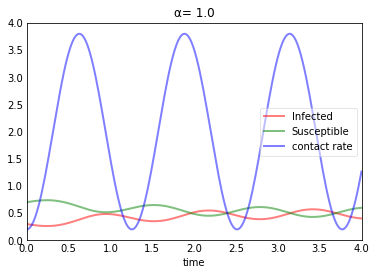

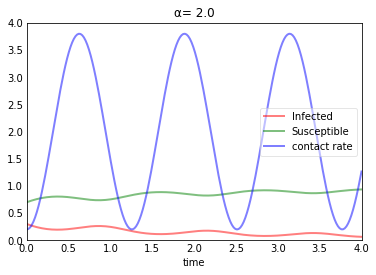

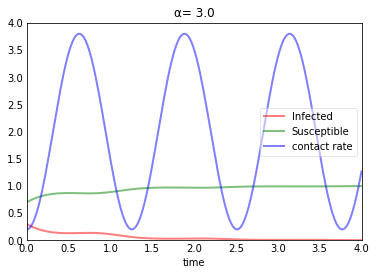

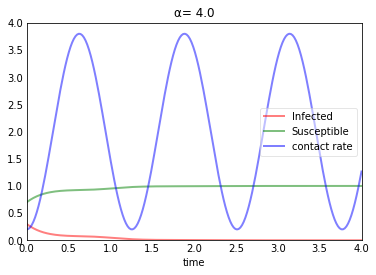

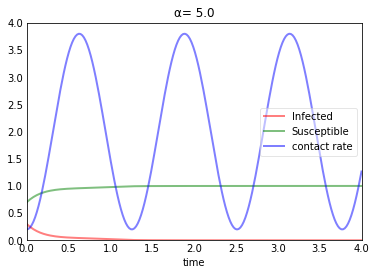

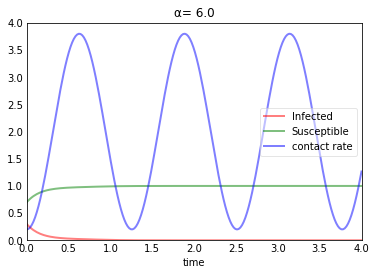

In [ ]:
def solve_SIS(g):
    I0 = 0.3
    N = 1 #population percentage
    S0 = N - I0
    alpha = g
    t = np.linspace(0, 4, 200) #time points
    
    def beta(t):
        r = 2 - 1.8*np.cos(5*t);
        return r

    # The SIS model differential equations.
    def deriv(y, t, N, alpha):
        I = y
        dIdt = (beta(t) * N-alpha) * I - beta(t) * (I**2)
        return dIdt
    
    y0 = I0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, alpha)) #Integrate the SIR equations over the time grid, t.
    I = ret
    
    def susc(N,I):
        s = N-I
        return s
    
    S = susc(N,I)
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("α= %r" %g)
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, S, 'g', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, beta(t), 'b', alpha=0.5, lw=2, label='contact rate')
    ax.set_xlabel('time')
    ax.set_ylim(0,4)
    ax.set_xlim(0,4)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
    
for i in np.linspace(1,6,num=6):
    solve_SIS(i)

#### Σχολιασμός SIS

Αρχικά σε αυτή την άσκηση να σχολιάσουμε πως προκύπτει η εξής διαφορική εξίσωση.
Παίρνουμε την S(t)+I(t)+R(t)=N την λύνουμε ως προς την S(t) και το αποτέλεσμα το βαζουμε στην διαφορική dI/dt όπως φαίνεται στις διαφάνειες και μετά κανονικοποιούμε ως προς το Ν.
Έτσι το α = γ*Ν, δηλαδή το α είναι ο ρυθμός ίασης ανηγμένος στον πληθυσμό και το βΝ σχετίζεται με τον πληθυσμός που αρρωσταίνει.
Ωστόσο το β εδώ δεν είναι σταθερό αλλά μεταβάλλεται με τον χρόνο με περίοδο 2π/5, έτσι βλέπουμε μια εποχικότητα όπως έχει ο ιός της γρίπης.
Το contact rate είναι το βΝ/γ που είναι επί της ουσίας το Ro ανηγμένο στο Ν.
 
Το γ είναι μικρότερο στην πρώτη εικόνα όπου α=1 όπου δηλαδή καπως απλουστευμένα θα μπορούσαμε να πούμε ότι τότε αργει να περάσει η νόσος. Τότε παρατηρούμε ότι υπάρχει μια περιοδικότητα των S και Ι και όταν έχουμε μεγάλο Ro βλέπουμε ότι οι S πεφτουν και το Ι μεγαλώνει αλλά όσο πέφτει το Ro αντιστρέφεται αυτό.
Όταν α=2 βλέπουμε ότι υπάρχει μια τάση για να υπάρξει η προηγούμενη περιοδικότητα αλλά επειδή περνάει γρήγορα η νόσος είναι χαμηλή.
Στα υπόλοιπα μοντέλα βλέπουμε ότι τα ποσοστά του S είναι πολύ υψηλά και ανεπηρέαστα από τα κύματα του ιου.
 
Τέλος, πολύ εντυπωσιακό συμπέρασμα είναι ότι το contact rate παραμένει σταθερό και ανεξάρτητο του α.
